In [1]:
import pandas as pd
import numpy as np
import pickle 
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
import xgboost as xgb
import numpy as np
import joblib  # For loading the model and scaler

def load_trained_model(model_path):
    """
    Load the trained XGBoost model and scaler from files.

    Args:
        model_path (str): Path to the trained XGBoost model file.
        scaler_path (str): Path to the scaler file.

    Returns:
        dict: A dictionary containing the loaded model and scaler.
    """
    model = xgb.XGBRegressor()
    model = joblib.load(model_path)

    return model

In [3]:
df = pd.read_csv("/kaggle/input/data-sih/Final_Anomaly_Removed_Data.csv")
df.drop(columns = ['Unnamed: 0'],inplace=True)
df.columns

Index(['EMUL_OIL_L_TEMP_PV_VAL0', 'STAND_OIL_L_TEMP_PV_REAL_VAL0',
       'GEAR_OIL_L_TEMP_PV_REAL_VAL0', 'EMUL_OIL_L_PR_VAL0',
       'QUENCH_CW_FLOW_EXIT_VAL0', 'CAST_WHEEL_RPM_VAL0', 'BAR_TEMP_VAL0',
       'QUENCH_CW_FLOW_ENTRY_VAL0', 'GEAR_OIL_L_PR_VAL0',
       'STANDS_OIL_L_PR_VAL0', 'TUNDISH_TEMP_VAL0',
       'RM_MOTOR_COOL_WATER__VAL0', 'ROLL_MILL_AMPS_VAL0',
       'RM_COOL_WATER_FLOW_VAL0', 'EMULSION_LEVEL_ANALO_VAL0', '   UTS',
       'Elongation', 'Conductivity', '%SI', '%FE', '%TI', '%V', '%AL',
       'Furnace_Temperature'],
      dtype='object')

In [4]:
# Normalization function
def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

# Inverse normalization function
def inverse_normalize_column(norm_column, min_val, max_val):
    return norm_column * (max_val - min_val) + min_val

# Normalize the data
normalized_data = df.apply(normalize_column)

In [5]:
X = normalized_data[['EMUL_OIL_L_TEMP_PV_VAL0', 'STAND_OIL_L_TEMP_PV_REAL_VAL0',
       'GEAR_OIL_L_TEMP_PV_REAL_VAL0', 'EMUL_OIL_L_PR_VAL0',
       'QUENCH_CW_FLOW_EXIT_VAL0', 'CAST_WHEEL_RPM_VAL0', 'BAR_TEMP_VAL0',
       'QUENCH_CW_FLOW_ENTRY_VAL0', 'GEAR_OIL_L_PR_VAL0',
       'STANDS_OIL_L_PR_VAL0', 'TUNDISH_TEMP_VAL0',
       'RM_MOTOR_COOL_WATER__VAL0', 'ROLL_MILL_AMPS_VAL0',
       'RM_COOL_WATER_FLOW_VAL0', 'EMULSION_LEVEL_ANALO_VAL0','Furnace_Temperature']]

Y = normalized_data[['   UTS','Elongation', 'Conductivity']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


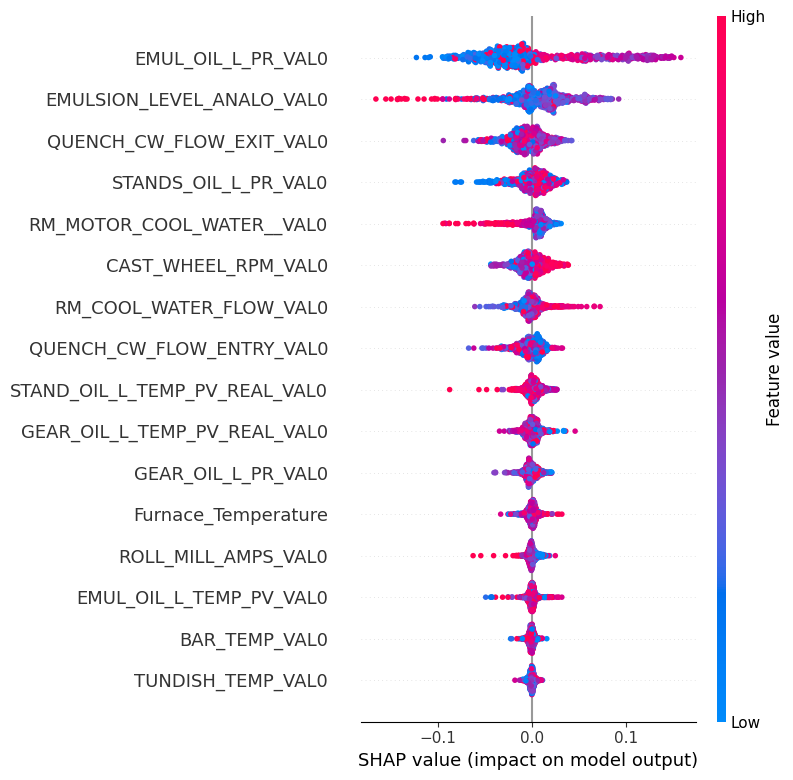

In [7]:
conductivity_model = "/kaggle/input/models/keras/default/1/xgboost_model_output_Conductivity.pkl"
model_C = load_trained_model(conductivity_model)
explainer_C = shap.Explainer(model_C)
shap_values_C = explainer_C(X_test)
shap.summary_plot(shap_values_C, X_test)

In [8]:
# Step 2.4: Identify the top 5 contributing features globally
global_shap_importance_C= np.abs(shap_values_C.values).mean(axis=0)
top_features_idx_C = np.argsort(global_shap_importance_C)[-7:][::-1]
top_features_C = X_test.columns[top_features_idx_C]

print("Top 7 contributing features:", list(top_features_C))

Top 7 contributing features: ['EMUL_OIL_L_PR_VAL0', 'EMULSION_LEVEL_ANALO_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'STANDS_OIL_L_PR_VAL0', 'RM_MOTOR_COOL_WATER__VAL0', 'CAST_WHEEL_RPM_VAL0', 'RM_COOL_WATER_FLOW_VAL0']


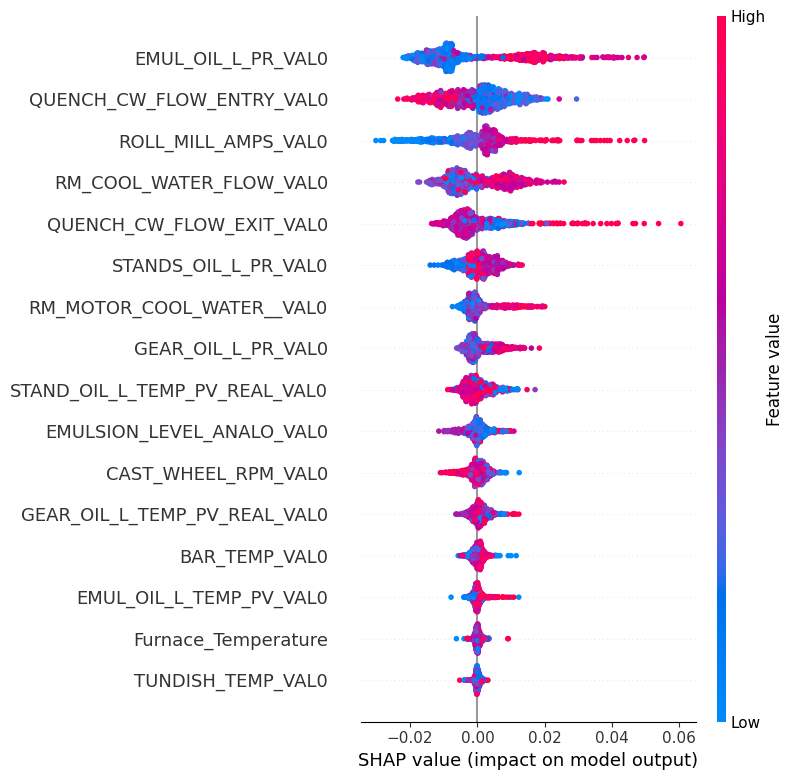

In [9]:
UTS_model_U = "/kaggle/input/models/keras/default/1/xgboost_model_output_   UTS.pkl"
model_U = load_trained_model(UTS_model_U)
explainer_U = shap.Explainer(model_U)
shap_values_U = explainer_U(X_test)
shap.summary_plot(shap_values_U, X_test)

In [10]:
# Step 2.4: Identify the top 5 contributing features globally
global_shap_importance_U= np.abs(shap_values_U.values).mean(axis=0)
top_features_idx_U = np.argsort(global_shap_importance_U)[-7:][::-1]
top_features_U = X_test.columns[top_features_idx_U]

print("Top 7 contributing features:", list(top_features_U))

Top 7 contributing features: ['EMUL_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0', 'ROLL_MILL_AMPS_VAL0', 'RM_COOL_WATER_FLOW_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'STANDS_OIL_L_PR_VAL0', 'RM_MOTOR_COOL_WATER__VAL0']


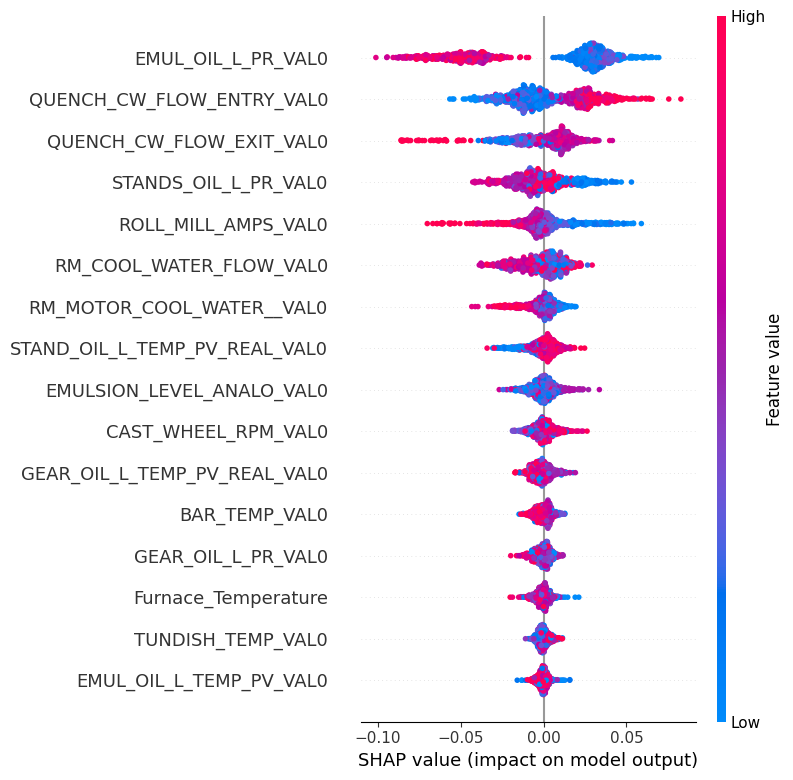

In [11]:
Elongation_model = "/kaggle/input/models/keras/default/1/xgboost_model_output_Elongation.pkl"
model_E = load_trained_model(Elongation_model)
explainer_E = shap.Explainer(model_E)
shap_values_E = explainer_E(X_test)
shap.summary_plot(shap_values_E, X_test)

In [12]:
# Step 2.4: Identify the top 5 contributing features globally
global_shap_importance_E= np.abs(shap_values_E.values).mean(axis=0)
top_features_idx_E = np.argsort(global_shap_importance_E)[-7:][::-1]
top_features_E = X_test.columns[top_features_idx_E]

print("Top 7 contributing features:", list(top_features_E))

Top 7 contributing features: ['EMUL_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'STANDS_OIL_L_PR_VAL0', 'ROLL_MILL_AMPS_VAL0', 'RM_COOL_WATER_FLOW_VAL0', 'RM_MOTOR_COOL_WATER__VAL0']


In [13]:
import numpy as np
import pandas as pd

# Function to calculate mean sensitivity scores over the entire dataset
def calculate_mean_sensitivity(model, X):
    # Create a DataFrame to hold sensitivity scores
    sensitivity_scores = pd.Series(index=X.columns)

    # Iterate through each feature to calculate its mean sensitivity
    for feature in X.columns:
        # Store changes in predictions
        changes = []

        for i in range(len(X)):
            # Perturb the feature slightly for the i-th instance
            X_perturbed = X.copy()
            X_perturbed.iloc[i, X.columns.get_loc(feature)] += 0.01  # Small perturbation

            # Get predictions for both original and perturbed data
            original_prediction = model.predict(X.iloc[[i]])
            perturbed_prediction = model.predict(X_perturbed.iloc[[i]])

            # Calculate change in prediction and store it
            change = np.abs(perturbed_prediction - original_prediction)
            changes.append(change[0])  # Append the scalar value

        # Mean sensitivity score for this feature
        sensitivity_scores[feature] = np.mean(changes)

    return sensitivity_scores


In [14]:
# Calculate mean sensitivity scores
mean_sensitivity_scores_C = calculate_mean_sensitivity(model_C, X_test)

# Identify top features based on mean sensitivity scores
top_sensitive_features_idx_C = np.argsort(mean_sensitivity_scores_C.values)[-7:][::-1]
top_sensitive_features_C = mean_sensitivity_scores_C.index[top_sensitive_features_idx_C]

print("Top 7 sensitive features based on mean sensitivity for Conductivity:", list(top_sensitive_features_C))

Top 7 sensitive features based on mean sensitivity for Conductivity: ['EMULSION_LEVEL_ANALO_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0', 'EMUL_OIL_L_TEMP_PV_VAL0', 'STANDS_OIL_L_PR_VAL0', 'TUNDISH_TEMP_VAL0', 'Furnace_Temperature']


In [15]:
# Calculate mean sensitivity scores
mean_sensitivity_scores_U = calculate_mean_sensitivity(model_U, X_test)

# Identify top features based on mean sensitivity scores
top_sensitive_features_idx_U = np.argsort(mean_sensitivity_scores_U.values)[-7:][::-1]
top_sensitive_features_U = mean_sensitivity_scores_U.index[top_sensitive_features_idx_U]

print("Top 7 sensitive features based on mean sensitivity for UTS:", list(top_sensitive_features_U))

Top 7 sensitive features based on mean sensitivity for UTS: ['EMUL_OIL_L_TEMP_PV_VAL0', 'EMULSION_LEVEL_ANALO_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'STANDS_OIL_L_PR_VAL0', 'TUNDISH_TEMP_VAL0', 'STAND_OIL_L_TEMP_PV_REAL_VAL0']


In [16]:
# Calculate mean sensitivity scores
mean_sensitivity_scores_E = calculate_mean_sensitivity(model_E, X_test)

# Identify top features based on mean sensitivity scores
top_sensitive_features_idx_E = np.argsort(mean_sensitivity_scores_E.values)[-7:][::-1]
top_sensitive_features_E = mean_sensitivity_scores_E.index[top_sensitive_features_idx_E]

print("Top 7 sensitive features based on mean sensitivity for Elongation:", list(top_sensitive_features_E))

Top 7 sensitive features based on mean sensitivity for Elongation: ['EMULSION_LEVEL_ANALO_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0', 'TUNDISH_TEMP_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'EMUL_OIL_L_TEMP_PV_VAL0', 'STANDS_OIL_L_PR_VAL0', 'CAST_WHEEL_RPM_VAL0']


In [17]:
# Find intersection of top features from SHAP and sensitivity analysis
intersection_features_C = set(top_features_C).intersection(set(top_sensitive_features_C))

print("Intersection of top features:", list(intersection_features_C))

Intersection of top features: ['STANDS_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'EMULSION_LEVEL_ANALO_VAL0']


In [18]:
# Find intersection of top features from SHAP and sensitivity analysis
intersection_features_E = set(top_features_E).intersection(set(top_sensitive_features_E))

print("Intersection of top features:", list(intersection_features_E))

Intersection of top features: ['STANDS_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0']


In [19]:
# Find intersection of top features from SHAP and sensitivity analysis
intersection_features_U = set(top_features_U).intersection(set(top_sensitive_features_U))

print("Intersection of top features:", list(intersection_features_U))

Intersection of top features: ['STANDS_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0']


In [8]:
# Load the dataset
data_file_path = "/kaggle/input/predicted-dataframe/predicted_df.csv"
df = pd.read_csv(data_file_path)

In [9]:
df.columns

Index(['EMUL_OIL_L_TEMP_PV_VAL0', 'STAND_OIL_L_TEMP_PV_REAL_VAL0',
       'GEAR_OIL_L_TEMP_PV_REAL_VAL0', 'EMUL_OIL_L_PR_VAL0',
       'QUENCH_CW_FLOW_EXIT_VAL0', 'CAST_WHEEL_RPM_VAL0', 'BAR_TEMP_VAL0',
       'QUENCH_CW_FLOW_ENTRY_VAL0', 'GEAR_OIL_L_PR_VAL0',
       'STANDS_OIL_L_PR_VAL0', 'TUNDISH_TEMP_VAL0',
       'RM_MOTOR_COOL_WATER__VAL0', 'ROLL_MILL_AMPS_VAL0',
       'RM_COOL_WATER_FLOW_VAL0', 'EMULSION_LEVEL_ANALO_VAL0',
       'Furnace_Temperature', '   UTS', 'Elongation', 'Conductivity'],
      dtype='object')

In [5]:
import numpy as np
import pandas as pd
import pickle

# Load the dataset
data_file_path = "/kaggle/input/predicted-dataframe/predicted_df.csv"
df = pd.read_csv(data_file_path)

# Normalize function using column-wise min and max
def normalize_column(column):
    """Normalize a column to [0, 1]."""
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val), min_val, max_val

# Inverse normalization function
def inverse_normalize_column(norm_column, min_val, max_val):
    """Inverse normalization to return to original scale."""
    return norm_column * (max_val - min_val) + min_val

# Normalize the dataset
normalized_data = pd.DataFrame()
min_max_values = {}

for column in df.columns:
    normalized_data[column], min_val, max_val = normalize_column(df[column])
    min_max_values[column] = (min_val, max_val)

# Extract input features and outputs
inputs = normalized_data.drop(columns=['   UTS', 'Elongation', 'Conductivity'])
outputs = normalized_data[['   UTS', 'Elongation', 'Conductivity']]

# Load models for Conductivity, Elongation, and UTS
conductivity_model_path = "/kaggle/input/models/keras/default/1/xgboost_model_output_Conductivity.pkl"
elongation_model_path = "/kaggle/input/models/keras/default/1/xgboost_model_output_Elongation.pkl"
uts_model_path = "/kaggle/input/models/keras/default/1/xgboost_model_output_   UTS.pkl"

def load_model(path):
    """Load a serialized model."""
    with open(path, 'rb') as f:
        return pickle.load(f)

conductivity_model = load_model(conductivity_model_path)
elongation_model = load_model(elongation_model_path)
uts_model = load_model(uts_model_path)

# Predict function for each model
def model_predict(model, X):
    """Predict output using the loaded model."""
    if isinstance(X, pd.Series):
        X = X.values.reshape(1, -1)
    elif isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    return model.predict(X)

# Find the row with the nearest output to the target
def find_nearest_row(target_output, column_name):
    """Find the row in the dataset with the output closest to the target."""
    distances = (outputs[column_name] - target_output).abs()
    nearest_index = distances.idxmin()
    nearest_row = inputs.iloc[nearest_index].copy()
    return nearest_row, outputs.iloc[nearest_index]

# Gradient Descent Optimization
def gradient_descent_optimize_all_features(model, X_instance, target_output, features_to_optimize, 
                                           learning_rate=0.01, max_iter=300, tolerance=0.001):
    """
    Optimize all features simultaneously using gradient descent.
    Ensures |target - predicted| decreases at each step.
    """
    current_instance = X_instance.copy()
    tol = tolerance

    for iteration in range(max_iter):
        # Predict current output and calculate error
        current_output = model_predict(model, current_instance)[0]
        error = target_output - current_output

        # Stop if error is within tolerance
        if abs(error) <= tol:
            print(f"Converged at iteration {iteration}")
            break

        # Initialize gradients
        gradients = {}

        # Calculate gradient for each feature
        for feature in features_to_optimize:
            perturbed_instance_plus = current_instance.copy()
            perturbed_instance_minus = current_instance.copy()

            perturbed_instance_plus[feature] += 0.1
            perturbed_instance_minus[feature] -= 0.1

            perturbed_output_plus = model_predict(model, perturbed_instance_plus)[0]
            perturbed_output_minus = model_predict(model, perturbed_instance_minus)[0]

            # Compute gradient using central difference
            gradient = (perturbed_output_plus - perturbed_output_minus) / 0.2
            gradients[feature] = gradient

        # Update features based on gradients
        for feature, gradient in gradients.items():
            # Update feature value
            current_instance[feature] += learning_rate * gradient * error

            # Clip values to remain within bounds [0, 1]
            current_instance[feature] = np.clip(current_instance[feature], 0, 1)

        # Print iteration details
        # print(f"Iteration {iteration}: Current Output = {current_output}, Error = {error}")

    return current_instance

# # Optimize for each target output using their respective models
targets_and_models = {
    'Conductivity': conductivity_model,
    'Elongation': elongation_model,
    '   UTS': uts_model
}
target_deltas = [0.3, 0.2, 0.1]  # Larger adjustments in normalized space
instance_index = 7
X_instance = inputs.iloc[instance_index].copy()
top_features_array = [['STANDS_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'EMULSION_LEVEL_ANALO_VAL0']]
i=0
varu=[['STANDS_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'EMULSION_LEVEL_ANALO_VAL0']]

target = 'Conductivity'
model = targets_and_models['Conductivity']
target_min, target_max = min_max_values[target]
top_features = top_features_array[i][:3]
# top_features = varu[0]

print(f"Top features for {target}: {list(top_features)}")

current_output = model_predict(model, X_instance)[0]
target_output = current_output + target_deltas[i]
nearest_row, nearest_output = find_nearest_row(target_output, target)
print(nearest_row)
print(f"\nOptimizing for {target}...")
print(f"Current {target} (normalized): {current_output}")
print(f"Target {target} (normalized): {target_output}")

# Use gradient descent-like optimization
optimized_instance = gradient_descent_optimize_all_features(model, X_instance=nearest_row,target_output=target_output,features_to_optimize= top_features)
print(optimized_instance)
new_output = model_predict(model, optimized_instance)[0]

# Convert outputs back to original scale
current_output_original = inverse_normalize_column(current_output, target_min, target_max)
target_output_original = inverse_normalize_column(target_output, target_min, target_max)
new_output_original = inverse_normalize_column(new_output, target_min, target_max)

print(f"Current {target} (original scale): {current_output_original}")
print(f"Target {target} (original scale): {target_output_original}")
print(f"New {target} (original scale) after optimization: {new_output_original}")

Top features for Conductivity: ['STANDS_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'EMULSION_LEVEL_ANALO_VAL0']
EMUL_OIL_L_TEMP_PV_VAL0          0.964644
STAND_OIL_L_TEMP_PV_REAL_VAL0    0.736111
GEAR_OIL_L_TEMP_PV_REAL_VAL0     0.540549
EMUL_OIL_L_PR_VAL0               0.063403
QUENCH_CW_FLOW_EXIT_VAL0         0.460937
CAST_WHEEL_RPM_VAL0              0.782552
BAR_TEMP_VAL0                    0.879807
QUENCH_CW_FLOW_ENTRY_VAL0        0.578668
GEAR_OIL_L_PR_VAL0               0.446894
STANDS_OIL_L_PR_VAL0             0.437004
TUNDISH_TEMP_VAL0                0.667982
RM_MOTOR_COOL_WATER__VAL0        0.419684
ROLL_MILL_AMPS_VAL0              0.087717
RM_COOL_WATER_FLOW_VAL0          0.881422
EMULSION_LEVEL_ANALO_VAL0        0.703738
Furnace_Temperature              0.532373
Name: 3763, dtype: float64

Optimizing for Conductivity...
Current Conductivity (normalized): 0.5251779556274414
Target Conductivity (normalized): 0.8251779556274415
EMUL_OIL_L_TEMP_PV_VAL0          0.964644
STAND_O

In [6]:
import numpy as np
import pandas as pd
import pickle

# Load the dataset
data_file_path = "/kaggle/input/predicted-dataframe/predicted_df.csv"
df = pd.read_csv(data_file_path)

# Normalize function using column-wise min and max
def normalize_column(column):
    """Normalize a column to [0, 1]."""
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val), min_val, max_val

# Inverse normalization function
def inverse_normalize_column(norm_column, min_val, max_val):
    """Inverse normalization to return to original scale."""
    return norm_column * (max_val - min_val) + min_val

# Normalize the dataset
normalized_data = pd.DataFrame()
min_max_values = {}

for column in df.columns:
    normalized_data[column], min_val, max_val = normalize_column(df[column])
    min_max_values[column] = (min_val, max_val)

# Extract input features and outputs
inputs = normalized_data.drop(columns=['   UTS', 'Elongation', 'Conductivity'])
outputs = normalized_data[['   UTS', 'Elongation', 'Conductivity']]

# Load models for Conductivity, Elongation, and UTS
conductivity_model_path = "/kaggle/input/models/keras/default/1/xgboost_model_output_Conductivity.pkl"
elongation_model_path = "/kaggle/input/models/keras/default/1/xgboost_model_output_Elongation.pkl"
uts_model_path = "/kaggle/input/models/keras/default/1/xgboost_model_output_   UTS.pkl"

def load_model(path):
    """Load a serialized model."""
    with open(path, 'rb') as f:
        return pickle.load(f)

conductivity_model = load_model(conductivity_model_path)
elongation_model = load_model(elongation_model_path)
uts_model = load_model(uts_model_path)

# Predict function for each model
def model_predict(model, X):
    """Predict output using the loaded model."""
    if isinstance(X, pd.Series):
        X = X.values.reshape(1, -1)
    elif isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    return model.predict(X)

# Find the row with the nearest output to the target
def find_nearest_row(target_output, column_name):
    """Find the row in the dataset with the output closest to the target."""
    distances = (outputs[column_name] - target_output).abs()
    nearest_index = distances.idxmin()
    nearest_row = inputs.iloc[nearest_index].copy()
    return nearest_row, outputs.iloc[nearest_index]

# Gradient Descent Optimization
def gradient_descent_optimize_all_features(model, X_instance, target_output, features_to_optimize, 
                                           learning_rate=0.01, max_iter=300, tolerance=0.001):
    """
    Optimize all features simultaneously using gradient descent.
    Ensures |target - predicted| decreases at each step.
    """
    current_instance = X_instance.copy()
    tol = tolerance

    for iteration in range(max_iter):
        # Predict current output and calculate error
        current_output = model_predict(model, current_instance)[0]
        error = target_output - current_output

        # Stop if error is within tolerance
        if abs(error) <= tol:
            print(f"Converged at iteration {iteration}")
            break

        # Initialize gradients
        gradients = {}

        # Calculate gradient for each feature
        for feature in features_to_optimize:
            perturbed_instance_plus = current_instance.copy()
            perturbed_instance_minus = current_instance.copy()

            perturbed_instance_plus[feature] += 0.1
            perturbed_instance_minus[feature] -= 0.1

            perturbed_output_plus = model_predict(model, perturbed_instance_plus)[0]
            perturbed_output_minus = model_predict(model, perturbed_instance_minus)[0]

            # Compute gradient using central difference
            gradient = (perturbed_output_plus - perturbed_output_minus) / 0.2
            gradients[feature] = gradient

        # Update features based on gradients
        for feature, gradient in gradients.items():
            # Update feature value
            current_instance[feature] += learning_rate * gradient * error

            # Clip values to remain within bounds [0, 1]
            current_instance[feature] = np.clip(current_instance[feature], 0, 1)

        # Print iteration details
        # print(f"Iteration {iteration}: Current Output = {current_output}, Error = {error}")

    return current_instance

# # Optimize for each target output using their respective models
targets_and_models = {
    'Conductivity': conductivity_model,
    'Elongation': elongation_model,
    '   UTS': uts_model
}
target_deltas = [0.3, 0.2, 0.1]  # Larger adjustments in normalized space
instance_index = 7
X_instance = inputs.iloc[instance_index].copy()
top_features_array = [['STANDS_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0']]
i=0
varu=[['STANDS_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0']]

target = '   UTS'
model = targets_and_models['   UTS']
target_min, target_max = min_max_values[target]
top_features = top_features_array[i][:3]
# top_features = varu[0]

print(f"Top features for {target}: {list(top_features)}")
current_output = model_predict(model, X_instance)[0]
target_output = current_output + target_deltas[i]
nearest_row, nearest_output = find_nearest_row(target_output, target)
print(nearest_row)
print(f"\nOptimizing for {target}...")
print(f"Current {target} (normalized): {current_output}")
print(f"Target {target} (normalized): {target_output}")

# Use gradient descent-like optimization
optimized_instance = gradient_descent_optimize_all_features(model, X_instance=nearest_row,target_output=target_output,features_to_optimize= top_features)
print(optimized_instance)
new_output = model_predict(model, optimized_instance)[0]

# Convert outputs back to original scale
current_output_original = inverse_normalize_column(current_output, target_min, target_max)
target_output_original = inverse_normalize_column(target_output, target_min, target_max)
new_output_original = inverse_normalize_column(new_output, target_min, target_max)

print(f"Current {target} (original scale): {current_output_original}")
print(f"Target {target} (original scale): {target_output_original}")
print(f"New {target} (original scale) after optimization: {new_output_original}")

# # Convert inputs back to original scale
# X_instance_original = X_instance.copy()
# optimized_instance_original = optimized_instance.copy()
# for feature in X_instance_original.index:
#     feature_min, feature_max = min_max_values[feature]
#     X_instance_original[feature] = inverse_normalize_column(X_instance_original[feature], feature_min, feature_max)
#     optimized_instance_original[feature] = inverse_normalize_column(optimized_instance_original[feature], feature_min, feature_max)

# print("\nOld Input Features (Original Scale):")
# print(X_instance_original)

# print("\nNew Optimized Input Features (Original Scale):")
# print(optimized_instance_original)
# i=i+1
# # Update the instance for subsequent optimizations
# X_instance = optimized_instance.copy()

Top features for    UTS: ['STANDS_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0']
EMUL_OIL_L_TEMP_PV_VAL0          0.965856
STAND_OIL_L_TEMP_PV_REAL_VAL0    0.773758
GEAR_OIL_L_TEMP_PV_REAL_VAL0     0.805307
EMUL_OIL_L_PR_VAL0               0.664439
QUENCH_CW_FLOW_EXIT_VAL0         0.768730
CAST_WHEEL_RPM_VAL0              0.727093
BAR_TEMP_VAL0                    0.810015
QUENCH_CW_FLOW_ENTRY_VAL0        0.549115
GEAR_OIL_L_PR_VAL0               0.274793
STANDS_OIL_L_PR_VAL0             0.775298
TUNDISH_TEMP_VAL0                0.705607
RM_MOTOR_COOL_WATER__VAL0        0.404747
ROLL_MILL_AMPS_VAL0              0.473121
RM_COOL_WATER_FLOW_VAL0          0.725547
EMULSION_LEVEL_ANALO_VAL0        0.676672
Furnace_Temperature              0.557530
Name: 2615, dtype: float64

Optimizing for    UTS...
Current    UTS (normalized): 0.5806534290313721
Target    UTS (normalized): 0.8806534290313721
EMUL_OIL_L_TEMP_PV_VAL0          0.965856
STAND_OIL_L_TEMP_PV_REAL_VAL0  

In [8]:
import numpy as np
import pandas as pd
import pickle

# Load the dataset
data_file_path = "/kaggle/input/predicted-dataframe/predicted_df.csv"
df = pd.read_csv(data_file_path)

# Normalize function using column-wise min and max
def normalize_column(column):
    """Normalize a column to [0, 1]."""
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val), min_val, max_val

# Inverse normalization function
def inverse_normalize_column(norm_column, min_val, max_val):
    """Inverse normalization to return to original scale."""
    return norm_column * (max_val - min_val) + min_val

# Normalize the dataset
normalized_data = pd.DataFrame()
min_max_values = {}

for column in df.columns:
    normalized_data[column], min_val, max_val = normalize_column(df[column])
    min_max_values[column] = (min_val, max_val)

# Extract input features and outputs
inputs = normalized_data.drop(columns=['   UTS', 'Elongation', 'Conductivity'])
outputs = normalized_data[['   UTS', 'Elongation', 'Conductivity']]

# Load models for Conductivity, Elongation, and UTS
conductivity_model_path = "/kaggle/input/models/keras/default/1/xgboost_model_output_Conductivity.pkl"
elongation_model_path = "/kaggle/input/models/keras/default/1/xgboost_model_output_Elongation.pkl"
uts_model_path = "/kaggle/input/models/keras/default/1/xgboost_model_output_   UTS.pkl"

def load_model(path):
    """Load a serialized model."""
    with open(path, 'rb') as f:
        return pickle.load(f)

conductivity_model = load_model(conductivity_model_path)
elongation_model = load_model(elongation_model_path)
uts_model = load_model(uts_model_path)

# Predict function for each model
def model_predict(model, X):
    """Predict output using the loaded model."""
    if isinstance(X, pd.Series):
        X = X.values.reshape(1, -1)
    elif isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    return model.predict(X)

# Find the row with the nearest output to the target
def find_nearest_row(target_output, column_name):
    """Find the row in the dataset with the output closest to the target."""
    distances = (outputs[column_name] - target_output).abs()
    nearest_index = distances.idxmin()
    nearest_row = inputs.iloc[nearest_index].copy()
    return nearest_row, outputs.iloc[nearest_index]

# Gradient Descent Optimization
def gradient_descent_optimize_all_features(model, X_instance, target_output, features_to_optimize, 
                                           learning_rate=0.01, max_iter=300, tolerance=0.001):
    """
    Optimize all features simultaneously using gradient descent.
    Ensures |target - predicted| decreases at each step.
    """
    current_instance = X_instance.copy()
    tol = tolerance

    for iteration in range(max_iter):
        # Predict current output and calculate error
        current_output = model_predict(model, current_instance)[0]
        error = target_output - current_output

        # Stop if error is within tolerance
        if abs(error) <= tol:
            print(f"Converged at iteration {iteration}")
            break

        # Initialize gradients
        gradients = {}

        # Calculate gradient for each feature
        for feature in features_to_optimize:
            perturbed_instance_plus = current_instance.copy()
            perturbed_instance_minus = current_instance.copy()

            perturbed_instance_plus[feature] += 0.1
            perturbed_instance_minus[feature] -= 0.1

            perturbed_output_plus = model_predict(model, perturbed_instance_plus)[0]
            perturbed_output_minus = model_predict(model, perturbed_instance_minus)[0]

            # Compute gradient using central difference
            gradient = (perturbed_output_plus - perturbed_output_minus) / 0.2
            gradients[feature] = gradient

        # Update features based on gradients
        for feature, gradient in gradients.items():
            # Update feature value
            current_instance[feature] += learning_rate * gradient * error

            # Clip values to remain within bounds [0, 1]
            current_instance[feature] = np.clip(current_instance[feature], 0, 1)

        # Print iteration details
        # print(f"Iteration {iteration}: Current Output = {current_output}, Error = {error}")

    return current_instance

# # Optimize for each target output using their respective models
targets_and_models = {
    'Conductivity': conductivity_model,
    'Elongation': elongation_model,
    '   UTS': uts_model
}
target_deltas = [0.3, 0.2, 0.1]  # Larger adjustments in normalized space
instance_index = 7
X_instance = inputs.iloc[instance_index].copy()
top_features_array = [['STANDS_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0']]
i=0
varu=[['STANDS_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0']]

target = 'Elongation'
model = targets_and_models['Elongation']
target_min, target_max = min_max_values[target]
top_features = top_features_array[i][:3]
# top_features = varu[0]

print(f"Top features for {target}: {list(top_features)}")
current_output = model_predict(model, X_instance)[0]
target_output = current_output + target_deltas[i]
nearest_row, nearest_output = find_nearest_row(target_output, target)
print(nearest_row)
print(f"\nOptimizing for {target}...")
print(f"Current {target} (normalized): {current_output}")
print(f"Target {target} (normalized): {target_output}")

# Use gradient descent-like optimization
optimized_instance = gradient_descent_optimize_all_features(model, X_instance=nearest_row,target_output=target_output,features_to_optimize= top_features)
print(optimized_instance)
new_output = model_predict(model, optimized_instance)[0]

# Convert outputs back to original scale
current_output_original = inverse_normalize_column(current_output, target_min, target_max)
target_output_original = inverse_normalize_column(target_output, target_min, target_max)
new_output_original = inverse_normalize_column(new_output, target_min, target_max)

print(f"Current {target} (original scale): {current_output_original}")
print(f"Target {target} (original scale): {target_output_original}")
print(f"New {target} (original scale) after optimization: {new_output_original}")

# # Convert inputs back to original scale
# X_instance_original = X_instance.copy()
# optimized_instance_original = optimized_instance.copy()
# for feature in X_instance_original.index:
#     feature_min, feature_max = min_max_values[feature]
#     X_instance_original[feature] = inverse_normalize_column(X_instance_original[feature], feature_min, feature_max)
#     optimized_instance_original[feature] = inverse_normalize_column(optimized_instance_original[feature], feature_min, feature_max)

# print("\nOld Input Features (Original Scale):")
# print(X_instance_original)

# print("\nNew Optimized Input Features (Original Scale):")
# print(optimized_instance_original)
# i=i+1
# # Update the instance for subsequent optimizations
# X_instance = optimized_instance.copy()

Top features for Elongation: ['STANDS_OIL_L_PR_VAL0', 'QUENCH_CW_FLOW_EXIT_VAL0', 'QUENCH_CW_FLOW_ENTRY_VAL0']
EMUL_OIL_L_TEMP_PV_VAL0          0.963247
STAND_OIL_L_TEMP_PV_REAL_VAL0    0.707025
GEAR_OIL_L_TEMP_PV_REAL_VAL0     0.497284
EMUL_OIL_L_PR_VAL0               0.111047
QUENCH_CW_FLOW_EXIT_VAL0         0.474660
CAST_WHEEL_RPM_VAL0              0.683253
BAR_TEMP_VAL0                    0.876410
QUENCH_CW_FLOW_ENTRY_VAL0        0.586528
GEAR_OIL_L_PR_VAL0               0.471310
STANDS_OIL_L_PR_VAL0             0.424152
TUNDISH_TEMP_VAL0                0.685124
RM_MOTOR_COOL_WATER__VAL0        0.439414
ROLL_MILL_AMPS_VAL0              0.085260
RM_COOL_WATER_FLOW_VAL0          0.863083
EMULSION_LEVEL_ANALO_VAL0        0.673421
Furnace_Temperature              0.574477
Name: 3870, dtype: float64

Optimizing for Elongation...
Current Elongation (normalized): 0.3760243356227875
Target Elongation (normalized): 0.6760243356227875
EMUL_OIL_L_TEMP_PV_VAL0          0.963247
STAND_OIL_L_TEM